In [1]:
cd ..

/Users/kimyoungh/GoogleDrive/rich/main/rich


In [2]:
import pickle
import numpy as np
import pandas as pd

import nasdaqdatalink

In [3]:
nasdaqdatalink.ApiConfig.api_key = "Q_ixj8VcQr3Jc2Jx68x2"

In [6]:
picked = pd.read_csv('train_data/global_index_picked.csv', header=0)

In [20]:
symbols = picked['Symbol'].values.tolist()

In [23]:
data = nasdaqdatalink.get_table("NDAQ/EIV",
        index_symbol=symbols[:100],
        qopts={'columns': 'date,index_symbol,eod_index_value'},
        date={'gte': '2005-12-30', 'lte': '2022-09-30'},
        paginate=True)

data = data.pivot_table(values='eod_index_value',
                        columns='index_symbol', index='date')

In [31]:
data2 = nasdaqdatalink.get_table("NDAQ/EIV",
        index_symbol=symbols[100:],
        qopts={'columns': 'date,index_symbol,eod_index_value'},
        date={'gte': '2005-12-30', 'lte': '2022-09-30'},
        paginate=True)

data2 = data2.pivot_table(values='eod_index_value',
                        columns='index_symbol', index='date')

In [4]:
data3 = nasdaqdatalink.get_table("NDAQ/EIV",
        index_symbol="NQKRKRW",
        qopts={'columns': 'date,index_symbol,eod_index_value'},
        date={'gte': '2004-12-30', 'lte': '2022-09-30'},
        paginate=True)

data3 = data3.pivot_table(values='eod_index_value',
                        columns='index_symbol', index='date')

In [11]:
data3.iloc[-250:-190]

index_symbol,NQKRKRW
date,
2021-10-11,1652.68
2021-10-12,1624.46
2021-10-13,1638.86
2021-10-14,1664.09
2021-10-15,1677.75
2021-10-18,1673.73
2021-10-19,1687.67
2021-10-20,1680.30
2021-10-21,1676.23


In [35]:
picked_1 = data.ffill().dropna(axis=1).columns.values.tolist()
picked_2 = data2.ffill().dropna(axis=1).columns.values.tolist()

picked = picked_1 + picked_2

In [40]:
with open('train_data/index_picked.pkl', 'wb') as f:
    pickle.dump(picked, f)

In [37]:
len(picked)

173

In [41]:
data = nasdaqdatalink.get_table("NDAQ/EIV",
        index_symbol=picked,
        qopts={'columns': 'date,index_symbol,eod_index_value'},
        date={'gte': '2005-12-30', 'lte': '2022-09-30'},
        paginate=True)

data = data.pivot_table(values='eod_index_value',
                        columns='index_symbol', index='date')

In [42]:
data

index_symbol,COMP,INDS,INSR,IXCO,IXHC,NBI,NQASIA,NQASIA10T,NQASIA15T,NQASIA20T,...,NQLA5010T,NQLA5020T,NQLA50T,NQLA5510T,NQLA55T,NQLA65T,NQLALCT,NQLAMCT,NQLASCT,NQLAT
date,,,,,,,,,,,,,,,,,,,,,
2005-12-30,2205.32,1859.87,3664.45,991.80,221.32,790.31,961.60,828.83,508.36,715.06,...,1244.91,448.33,753.90,367.86,358.88,400.66,452.61,378.67,289.35,432.08
2006-01-03,2243.74,1881.68,3696.81,1017.97,224.09,800.97,973.62,844.07,513.37,724.38,...,1286.43,456.76,775.58,378.05,368.61,405.59,468.24,379.15,290.84,444.33
2006-01-04,2263.46,1893.19,3724.95,1026.09,225.64,806.63,989.26,861.58,520.16,735.34,...,1297.42,470.62,787.49,388.04,378.25,414.90,480.65,388.12,295.17,455.73
2006-01-05,2276.87,1898.60,3712.43,1036.53,225.91,811.08,999.94,873.92,531.07,745.67,...,1284.89,481.23,787.91,388.72,379.00,417.65,482.56,390.94,296.09,457.74
2006-01-06,2305.62,1921.27,3738.70,1052.34,227.38,819.74,1008.51,882.11,532.25,748.57,...,1285.63,491.91,793.88,391.17,381.27,420.45,490.33,393.66,298.97,464.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,10802.92,8230.31,9875.18,8091.12,795.92,3630.92,1204.18,2837.96,1435.87,1626.73,...,340.42,808.35,617.75,883.37,936.37,875.26,686.53,1158.38,645.58,753.66
2022-09-27,10829.50,8251.86,9924.41,8112.45,803.30,3685.72,1206.43,2852.33,1429.67,1637.17,...,338.06,811.07,619.02,884.88,940.94,859.17,687.50,1153.22,643.76,753.49
2022-09-28,11051.64,8478.24,10137.06,8214.22,834.59,3844.36,1183.49,2783.71,1410.08,1636.94,...,341.76,825.66,629.61,889.68,942.47,852.37,689.23,1156.40,648.34,755.78


In [43]:
data.to_parquet('train_data/global_index_series.pq')

<AxesSubplot:xlabel='date'>

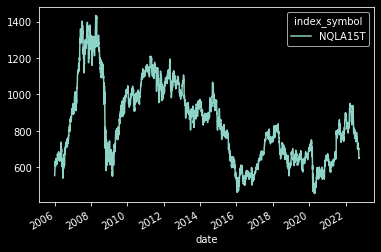

In [54]:
data.plot()

In [45]:
20239 / 60 / 60

5.621944444444444